# Ejercicio 1
 ---


**A) Determinar el período de la secuencia de Von Neumann generada a partir de las semillas:**
- 3009
- 7600
- 1234
- 4321

In [1]:
from generators import Von_Neumann

seeds = [3009, 7600, 1234, 4321]
for seed in seeds:
    period = Von_Neumann.period(seed=seed)
    print(f"El periodo de la semilla [{seed}] es -> {period}")

El periodo de la semilla [3009] es -> 4
El periodo de la semilla [7600] es -> 1
El periodo de la semilla [1234] es -> 57
El periodo de la semilla [4321] es -> 71


**B) Dar el valor de c y de a para que cada generador tenga período máximo.**
- $y_{i+1}=5y_i+c \bmod(2⁵)$ -> Generador lineal congruencial **mixto**
- $x_{i+1}=ax_i \bmod(31)$ -> Generador lineal congruencial **multiplicativo**

**Considerar el generador** $z_{i+1}=x_i+y_i \bmod(2⁵)$ **y calcular su período.** 

In [4]:
# Ejemplo del Generador Lineal Congruencial Mixto
from generators import LinearCongruentialMixed
congruential_mixed = LinearCongruentialMixed.is_maximum_period(a=5, c=3, M=16)
print(f"El Generador Congruencial Lineal Mixto tiene periodo MÁXIMO -> {congruential_mixed}")

El Generador Congruencial Lineal Mixto tiene periodo MÁXIMO -> True


In [1]:
# Ejemplo del Generador Lineal Congruencial Multiplicativo
from generators import LinearCongruentialMultiplicative
primitive_root_candidates = LinearCongruentialMultiplicative.root_primitive_candidates(M=31)
print(f"Los candidatos a raíz primitiva son -> {primitive_root_candidates}")

Descomposición Prima de 30 -> [2, 3, 5]
Los candidatos a raíz primitiva son -> [3, 11, 12, 13, 17, 21, 22, 24]


**Representación gráfica de $(y_i,y_i+1), (x_i,x_i+1)$ y $(z_i,z_i+1)$**

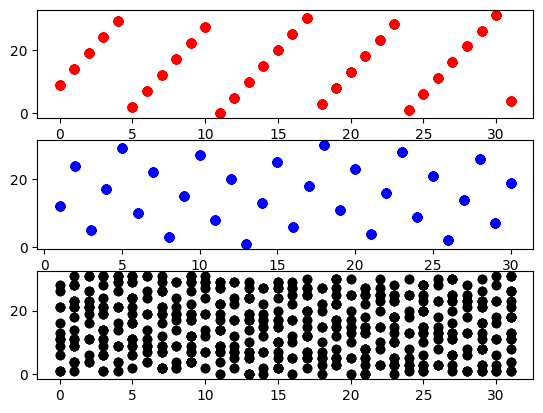

In [1]:
# Generador** $z_{i+1}=x_i+y_i \bmod(2⁵) y calcular su período. 
import matplotlib.pyplot as plt
from generators import InventedCongruentialWithSumm

# Test generador_nuevo
ys, xs, zs = InventedCongruentialWithSumm.invented_congruential_sum(a=12, c=9,M=32 ,iterations=1000, X_seed=1, Y_seed=1)

fig, ax = plt.subplots(3, 1)
ax[0].plot(ys[:-1], ys[1:], 'ro', label='y')
ax[1].plot(xs[:-1], xs[1:], 'bo', label='x')
ax[2].plot(zs[:-1], zs[1:], 'ko', label='z')
plt.show()

**C) Indicar en cuáles de los siguientes casos el generador:**
- $y_{i+1}=ay_i+c \bmod(M)$

**genera una secuencia de período máximo.**

In [ ]:
from generators import LinearCongruentialMixed
#(a,c,M)
inputs = [(125,3,2**9), (123,3,2**9), (125,3,2**9), (5,0,71), (7,0,71)]

for inps in inputs:
    print(f"a = {inps[0]}, c = {inps[1]}, M = {inps[2]} genera una secuencia de período máximo -> {LinearCongruentialMixed.is_maximum_period(inps[0],inps[1], inps[2])}")

Los parámetros a:125, c:3, M:512 genera una secuencia de período máximo -> True
Los parámetros a:123, c:3, M:512 genera una secuencia de período máximo -> False
Los parámetros a:125, c:3, M:512 genera una secuencia de período máximo -> True
Los parámetros a:5, c:0, M:71 genera una secuencia de período máximo -> False
Los parámetros a:7, c:0, M:71 genera una secuencia de período máximo -> False
